# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('Data/heroes_information.csv')
powers_df = pd.read_csv('Data/super_hero_powers.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
heroes_df.tail()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0
733,733,Zoom,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0


In [5]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
powers_df.tail()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
666,Zoom,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [7]:
print(heroes_df.columns, heroes_df.shape)
heroes_df = heroes_df.drop(columns = ['Unnamed: 0'])
print(heroes_df.columns, heroes_df.shape)
heroes_df.head()

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object') (734, 11)
Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object') (734, 10)


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


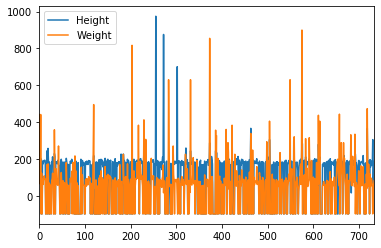

In [8]:
print(heroes_df.info())
print(heroes_df.describe())
heroes_df.plot()

In [9]:
print(powers_df.info())
powers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Man-Wolf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [10]:
powers_df.shape

(667, 168)

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [11]:
# use .info() to find columns with null values 
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [12]:
print(heroes_df['Weight'].min())
print(heroes_df['Weight'].mean())


-99.0
43.8551912568306


In [13]:
heroes_df['Weight'].fillna( 43.8551912568306, inplace = True)


In [14]:
print(heroes_df['Weight'].min())
print(heroes_df['Weight'].mean())

-99.0
43.855191256830594


In [15]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [16]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [17]:
heroes_df['Publisher'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
729    False
730    False
731    False
732    False
733    False
Name: Publisher, Length: 734, dtype: bool

In [18]:
heroes_df[ heroes_df['Publisher'].isnull() ] = 'unknown'

In [19]:
heroes_df['Publisher'].isnull().sum()

0

In [20]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'unknown', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [21]:
heroes_df.set_index('name',inplace = True)
heroes_df




,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165,Marvel Comics,-,good,52
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99
Yoda,Male,brown,Yoda's species,White,66,George Lucas,green,good,17


In [22]:
powers_df.set_index('hero_names',inplace = True)
powers_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [23]:
heroes_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165,Marvel Comics,-,good,52
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99
Yoda,Male,brown,Yoda's species,White,66,George Lucas,green,good,17


In [24]:
dfjoin=heroes_df.join(powers_df,how='left')

In [25]:
dfjoin

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
heroes_df.shape

(734, 9)

In [33]:
print(heroes_df.shape,powers_df.shape,dfjoin.shape)

(734, 9) (667, 167) (734, 176)


In [38]:
heroes_dfsmall=heroes_df.iloc[:,0:2]
heroes_dfsmall

,Gender,Eye color
name,,
A-Bomb,Male,yellow
Abe Sapien,Male,blue
Abin Sur,Male,blue
Abomination,Male,green
Abraxas,Male,blue
...,...,...
Yellowjacket II,Female,blue
Ymir,Male,white
Yoda,Male,brown


In [40]:
powers_dfsmall=powers_df.iloc[:,0:2]
powers_dfsmall


,Agility,Accelerated Healing
hero_names,,
3-D Man,True,False
A-Bomb,False,True
Abe Sapien,True,True
Abin Sur,False,False
Abomination,False,True
...,...,...
Yellowjacket II,False,False
Ymir,False,False
Yoda,True,False


In [49]:
dfjoinsmall=heroes_dfsmall.join(powers_dfsmall,how='left')
dfjoinsmall

,Gender,Eye color,Agility,Accelerated Healing
A-Bomb,Male,yellow,False,True
Abe Sapien,Male,blue,True,True
Abin Sur,Male,blue,False,False
Abomination,Male,green,False,True
Abraxas,Male,blue,False,False
...,...,...,...,...
unknown,unknown,unknown,NaN,NaN
unknown,unknown,unknown,NaN,NaN
unknown,unknown,unknown,NaN,NaN
unknown,unknown,unknown,NaN,NaN


In [51]:
dfjoinsmall.reset_index(inplace=True)

In [52]:
dfjoinsmall

,index,Gender,Eye color,Agility,Accelerated Healing
0,A-Bomb,Male,yellow,False,True
1,Abe Sapien,Male,blue,True,True
2,Abin Sur,Male,blue,False,False
3,Abomination,Male,green,False,True
4,Abraxas,Male,blue,False,False
...,...,...,...,...,...
729,unknown,unknown,unknown,NaN,NaN
730,unknown,unknown,unknown,NaN,NaN
731,unknown,unknown,unknown,NaN,NaN
732,unknown,unknown,unknown,NaN,NaN


In [65]:
(heroes_df.duplicated() == True).any()


True

In [76]:
tobedeleted = heroes_df[heroes_df.duplicated(keep = True)]
tobedeleted

ValueError: keep must be either "first", "last" or False

In [176]:
df=pd.DataFrame([[0,1,2],[0,1,2,],[4,5,6],[5,6,7]])
df.columns = ['a','b','c']
df

,a,b,c
0,0,1,2
1,0,1,2
2,4,5,6
3,5,6,7


In [177]:
df.duplicated()

0    False
1     True
2    False
3    False
dtype: bool

In [178]:
df.duplicated(keep='first')

0    False
1     True
2    False
3    False
dtype: bool

In [179]:
df[df.duplicated(keep='first')]

,a,b,c
1,0,1,2


In [180]:
df


,a,b,c
0,0,1,2
1,0,1,2
2,4,5,6
3,5,6,7


In [181]:
df2=pd.DataFrame([[0,6,7],[0,6,7],[5,5,6]])
df2

,0,1,2
0,0,6,7
1,0,6,7
2,5,5,6


In [182]:
df = df.set_index('a')

# df3=df.join(df2,how='left')
# df3

In [183]:
df

,b,c
a,,
0,1,2
0,1,2
4,5,6
5,6,7


In [184]:
df2.columns = ['d','e','f']
df2

,d,e,f
0,0,6,7
1,0,6,7
2,5,5,6


In [185]:
df2 = df2.set_index('d')


In [186]:
df2

,e,f
d,,
0,6,7
0,6,7
5,5,6


In [187]:
dfjoin=df.join(df2,how='left')
print(df,'\n',df2,'\n',dfjoin)

   b  c
a      
0  1  2
0  1  2
4  5  6
5  6  7 
    e  f
d      
0  6  7
0  6  7
5  5  6 
    b  c    e    f
0  1  2  6.0  7.0
0  1  2  6.0  7.0
0  1  2  6.0  7.0
0  1  2  6.0  7.0
4  5  6  NaN  NaN
5  6  7  5.0  6.0


In [188]:
heroes_dfsmall

,name,Gender,Eye color
0,A-Bomb,Male,yellow
1,Abe Sapien,Male,blue
2,Abin Sur,Male,blue
3,Abomination,Male,green
4,Abraxas,Male,blue
...,...,...,...
729,Yellowjacket II,Female,blue
730,Ymir,Male,white
731,Yoda,Male,brown
732,Zatanna,Female,blue


In [139]:
powers_dfsmall.duplicated()

hero_names
3-D Man            False
A-Bomb             False
Abe Sapien         False
Abin Sur           False
Abomination         True
                   ...  
Yellowjacket II     True
Ymir                True
Yoda                True
Zatanna             True
Zoom                True
Length: 667, dtype: bool

In [146]:
powers_dfsmall.iloc[4,:]

Agility                False
Accelerated Healing     True
Name: Abomination, dtype: bool

In [151]:
heroes_dfsmall.reset_index(inplace=True)

In [152]:
heroes_dfsmall.loc[heroes_dfsmall['name'] == 'unknown']

,name,Gender,Eye color
46,unknown,unknown,unknown
86,unknown,unknown,unknown
138,unknown,unknown,unknown
175,unknown,unknown,unknown
204,unknown,unknown,unknown
244,unknown,unknown,unknown
263,unknown,unknown,unknown
286,unknown,unknown,unknown
348,unknown,unknown,unknown
354,unknown,unknown,unknown


In [153]:
powers_dfsmall.reset_index(inplace=True)
powers_dfsmall

,hero_names,Agility,Accelerated Healing
0,3-D Man,True,False
1,A-Bomb,False,True
2,Abe Sapien,True,True
3,Abin Sur,False,False
4,Abomination,False,True
...,...,...,...
662,Yellowjacket II,False,False
663,Ymir,False,False
664,Yoda,True,False
665,Zatanna,False,False


In [157]:
powers_dfsmall.loc[powers_dfsmall['hero_names'] == 'unknown']

,hero_names,Agility,Accelerated Healing


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [158]:
dfmale= heroes_df[ heroes_df['Gender']=='Male' ]

In [159]:
dfmale

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellow Claw,Male,blue,-,No Hair,188,Marvel Comics,-,bad,95
Yellowjacket,Male,blue,Human,Blond,183,Marvel Comics,-,good,83
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99


In [160]:
dffemale= heroes_df[ heroes_df['Gender']=='Female' ]

In [161]:
dffemale

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
Agent 13,Female,blue,-,Blond,173,Marvel Comics,-,good,61
Angel Dust,Female,yellow,Mutant,Black,165,Marvel Comics,-,good,57
Angel Salvadore,Female,brown,-,Black,163,Marvel Comics,-,good,54
Angela,Female,-,-,-,-99,Image Comics,-,bad,-99
Arachne,Female,blue,Human,Blond,175,Marvel Comics,-,good,63
...,...,...,...,...,...,...,...,...,...
Wonder Woman,Female,blue,Amazon,Black,183,DC Comics,-,good,74
Wondra,Female,-,-,-,-99,Marvel Comics,-,good,-99
X-23,Female,green,Mutant / Clone,Black,155,Marvel Comics,-,good,50


In [206]:
heroes_df['Height'].unique()
# heroes_df.astype({'Height': float,'Weight':float})

array([203.0, 191.0, 185.0, -99.0, 193.0, 173.0, 178.0, 188.0, 180.0,
       244.0, 257.0, 183.0, 165.0, 163.0, 211.0, 61.0, 229.0, 213.0,
       175.0, 'unknown', 198.0, 168.0, 170.0, 201.0, 218.0, 30.5, 196.0,
       157.0, 226.0, 267.0, 122.0, 975.0, 142.0, 876.0, 62.5, 701.0,
       259.0, 79.0, 155.0, 71.0, 287.0, 234.0, 64.0, 366.0, 206.0, 305.0,
       297.0, 137.0, 279.0, 15.2, 140.0, 160.0, 304.8, 66.0], dtype=object)

In [207]:
heroes_df['Weight'].unique()

array([441.0, 65.0, 90.0, -99.0, 122.0, 88.0, 61.0, 81.0, 104.0, 108.0,
       72.0, 169.0, 173.0, 101.0, 68.0, 57.0, 54.0, 83.0, 86.0, 358.0,
       135.0, 106.0, 146.0, 63.0, 98.0, 270.0, 59.0, 50.0, 'unknown',
       126.0, 67.0, 180.0, 77.0, 52.0, 95.0, 79.0, 133.0, 181.0, 216.0,
       71.0, 124.0, 155.0, 113.0, 58.0, 92.0, 97.0, 56.0, 230.0, 495.0,
       55.0, 110.0, 99.0, 158.0, 74.0, 116.0, 62.0, 170.0, 70.0, 78.0,
       225.0, 817.0, 27.0, 91.0, 178.0, 383.0, 171.0, 187.0, 132.0, 89.0,
       412.0, 306.0, 80.0, 203.0, 96.0, 18.0, 45.0, 167.0, 16.0, 630.0,
       268.0, 115.0, 4.0, 48.0, 119.0, 207.0, 191.0, 2.0, 14.0, 49.0,
       855.0, 356.0, 324.0, 360.0, 288.0, 236.0, 36.0, 140.0, 128.0,
       338.0, 248.0, 125.0, 85.0, 293.0, 69.0, 405.0, 117.0, 87.0, 234.0,
       320.0, 38.0, 25.0, 900.0, 310.0, 149.0, 315.0, 153.0, 437.0, 131.0,
       47.0, 176.0, 198.0, 443.0, 143.0, 76.0, 82.0, 105.0, 331.0, 214.0,
       73.0, 334.0, 41.0, 162.0, 39.0, 473.0, 51.0, 17.0], dtype

In [210]:
to_drop= heroes_df[heroes_df['Weight'] == 'unknown']
to_drop.index
heroes_df2 = heroes_df.drop(to_drop.index,axis=0,inplace = False) 
heroes_df2

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165,Marvel Comics,-,good,52
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99
Yoda,Male,brown,Yoda's species,White,66,George Lucas,green,good,17


In [212]:
to_drop2= heroes_df2[heroes_df2['Height'] == 'unknown']
heroes_df3 = heroes_df2.drop(to_drop2.index,axis=0,inplace = False) 
heroes_df3

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165,Marvel Comics,-,good,52
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99
Yoda,Male,brown,Yoda's species,White,66,George Lucas,green,good,17


In [217]:
heroes_df3['Gender'].unique()

array(['Male', 'Female', '-'], dtype=object)

In [219]:
to_drop3=heroes_df3[heroes_df3['Gender']=='-']
heroes_df4=heroes_df3.drop(to_drop3.index,axis=0,inplace=False)
heroes_df4

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165,Marvel Comics,-,good,52
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99
Yoda,Male,brown,Yoda's species,White,66,George Lucas,green,good,17


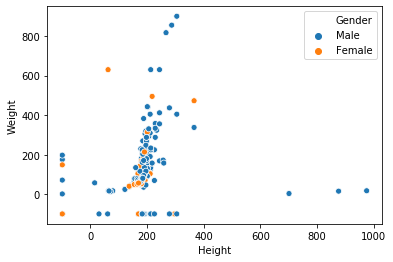

In [234]:
heroes_df5=heroes_df4.astype({'Height': float,'Weight':float,'Gender': str})
import seaborn as sns

sns.scatterplot(x='Height',y='Weight',hue='Gender',data=heroes_df5)

In [235]:
heroes_df5.dtypes

Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

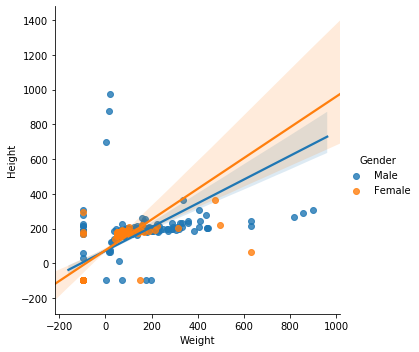

In [237]:
sns.lmplot(x='Weight',y='Height',hue='Gender',data=heroes_df5)

In [239]:
heroes_df5.dtypes

Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [243]:
male_heroes_df=heroes_df5[heroes_df5['Gender']== 'Male']
male_heroes_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...
Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,95.0
Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0


In [244]:
female_heroes_df=heroes_df5[heroes_df5['Gender']== 'Female']
female_heroes_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0
Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0
Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0
...,...,...,...,...,...,...,...,...,...
Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,-,good,74.0
Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0
X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0


In [245]:
# male_heroes_df = None
# female_heroes_df = None

def show_distplot(gender, column_name):
    if gender == 'Male':
        sns.distplot(male_heroes_df[column_name])
    else:
        sns.distplot(female_heroes_df[column_name])


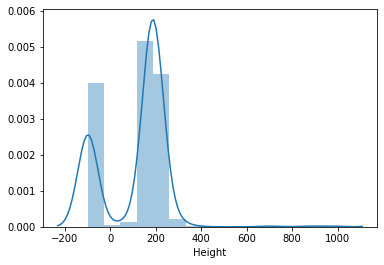

In [247]:
# Male Height
show_distplot('Male','Height')

In [ ]:
# Male Weight


In [ ]:
# Female Height


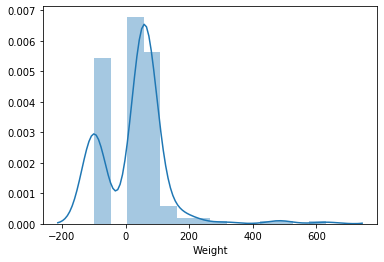

In [248]:
# Female Weight
show_distplot('Female','Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [252]:
powers_df.columns

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [254]:
powers_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [280]:
mapo={True:1,False:0}
listo=[]
for col in powers_df.columns:
    powers_df[col]=powers_df[col].map(mapo)

In [281]:
powers_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abomination,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Ymir,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yoda,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [284]:
dico=dict(powers_df.sum())
dico

{'Agility': 242,
 'Accelerated Healing': 178,
 'Lantern Power Ring': 11,
 'Dimensional Awareness': 25,
 'Cold Resistance': 47,
 'Durability': 257,
 'Stealth': 126,
 'Energy Absorption': 77,
 'Flight': 212,
 'Danger Sense': 30,
 'Underwater breathing': 21,
 'Marksmanship': 119,
 'Weapons Master': 105,
 'Power Augmentation': 8,
 'Animal Attributes': 25,
 'Longevity': 113,
 'Intelligence': 158,
 'Super Strength': 360,
 'Cryokinesis': 19,
 'Telepathy': 92,
 'Energy Armor': 8,
 'Energy Blasts': 147,
 'Duplication': 16,
 'Size Changing': 55,
 'Density Control': 15,
 'Stamina': 289,
 'Astral Travel': 4,
 'Audio Control': 7,
 'Dexterity': 6,
 'Omnitrix': 1,
 'Super Speed': 249,
 'Possession': 8,
 'Animal Oriented Powers': 40,
 'Weapon-based Powers': 58,
 'Electrokinesis': 22,
 'Darkforce Manipulation': 10,
 'Death Touch': 7,
 'Teleportation': 72,
 'Enhanced Senses': 89,
 'Telekinesis': 61,
 'Energy Beams': 42,
 'Magic': 44,
 'Hyperkinesis': 1,
 'Jump': 65,
 'Clairvoyance': 4,
 'Dimensional Tra

In [288]:
sorted(dico.items(), key=lambda x: x[1], reverse=True)

[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242),
 ('Flight', 212),
 ('Accelerated Healing', 178),
 ('Reflexes', 164),
 ('Intelligence', 158),
 ('Energy Blasts', 147),
 ('Stealth', 126),
 ('Marksmanship', 119),
 ('Invulnerability', 117),
 ('Longevity', 113),
 ('Weapons Master', 105),
 ('Telepathy', 92),
 ('Enhanced Senses', 89),
 ('Force Fields', 86),
 ('Energy Absorption', 77),
 ('Teleportation', 72),
 ('Enhanced Hearing', 72),
 ('Immortality', 69),
 ('Shapeshifting', 66),
 ('Jump', 65),
 ('Telekinesis', 61),
 ('Weapon-based Powers', 58),
 ('Natural Weapons', 58),
 ('Size Changing', 55),
 ('Energy Manipulation', 52),
 ('Psionic Powers', 49),
 ('Toxin and Disease Resistance', 48),
 ('Cold Resistance', 47),
 ('Magic', 44),
 ('Heat Resistance', 43),
 ('Vision - Telescopic', 43),
 ('Energy Beams', 42),
 ('Molecular Manipulation', 42),
 ('Animal Oriented Powers', 40),
 ('Energy Constructs', 38),
 ('Illusions', 38),
 ('Self-Sustenan

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data